In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [2]:
# 1. 生成三分类数据集
X, y = make_classification(
    n_samples=600,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=0
)

In [3]:
# 2. 划分训练与测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
# 3. 构建并训练神经网络（多分类）
model = MLPClassifier(
    hidden_layer_sizes=(8,),  # 单隐藏层 10 个神经元
    activation='relu',         # ReLU 激活
    solver='adam',             # Adam 优化
    learning_rate_init=0.01,
    max_iter=500,
    random_state=42
)

In [5]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(8,), learning_rate_init=0.01, max_iter=500,
              random_state=42)

In [6]:
# 4. 模型评估
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2'])

In [7]:
print(f"测试集准确率: {acc:.2f}\n")
print("混淆矩阵:")
print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1', 'Actual 2'],
                   columns=['Pred 0', 'Pred 1', 'Pred 2']))
print("\n分类报告:")
print(report)

测试集准确率: 0.98

混淆矩阵:
          Pred 0  Pred 1  Pred 2
Actual 0      56       1       0
Actual 1       1      64       1
Actual 2       1       0      56

分类报告:
              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.97        57
     Class 1       0.98      0.97      0.98        66
     Class 2       0.98      0.98      0.98        57

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



In [8]:
# 5. 可视化决策边界
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

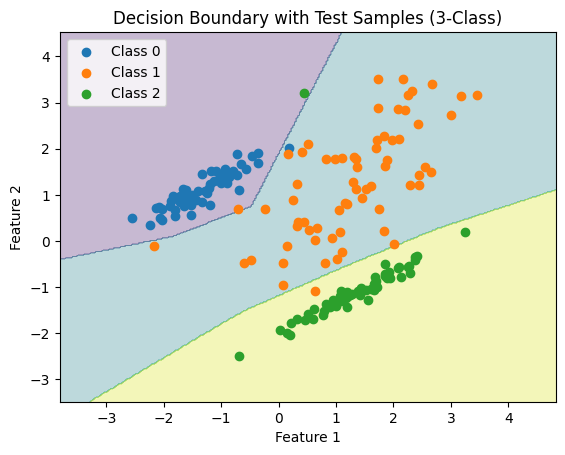

In [9]:
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
for cls in np.unique(y_test):
    plt.scatter(
        X_test[y_test == cls, 0],
        X_test[y_test == cls, 1],
        label=f'Class {cls}'
    )
plt.title('Decision Boundary with Test Samples (3-Class)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

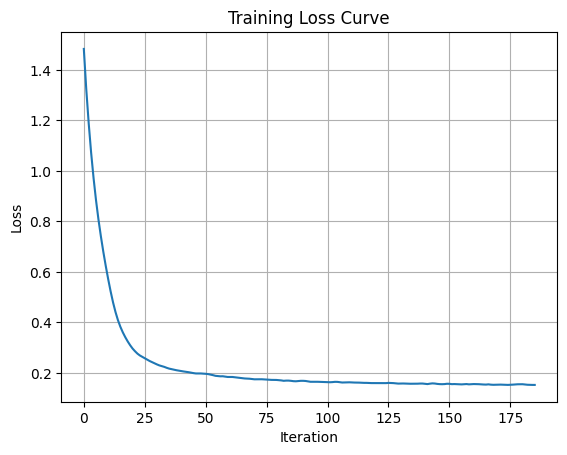

In [11]:
# 6. 训练损失曲线
plt.figure()
plt.plot(model.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()